In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

In [3]:
path = '/content/drive/My Drive/Kuliah/dataset'

In [4]:
df = pd.read_csv(os.path.join(path, "Data clean.csv"))

In [5]:
df

,Unnamed: 0,Nomor_Pesanan,Quantity,Harga_Satuan,SALES,STATUS
0,0,10107,30,95.70,2871.00,Shipped
1,1,10121,34,81.35,2765.90,Shipped
2,2,10134,41,94.74,3884.34,Shipped
3,3,10145,45,83.26,3746.70,Shipped
4,4,10159,49,100.00,5205.27,Shipped
...,...,...,...,...,...,...
2817,2817,10350,20,100.00,2244.40,Shipped
2818,2818,10373,29,100.00,3978.51,Shipped
2819,2819,10386,43,100.00,5417.57,Resolved
2820,2820,10397,34,62.24,2116.16,Shipped


In [6]:
df['SALES_transform'] = df['SALES'].transform(func = lambda x : x/1000)
df.head()

,Unnamed: 0,Nomor_Pesanan,Quantity,Harga_Satuan,SALES,STATUS,SALES_transform
0,0,10107,30,95.70,2871.00,Shipped,2.87100
1,1,10121,34,81.35,2765.90,Shipped,2.76590
2,2,10134,41,94.74,3884.34,Shipped,3.88434
3,3,10145,45,83.26,3746.70,Shipped,3.74670
4,4,10159,49,100.00,5205.27,Shipped,5.20527


Membuat data korelasi harga satuan dengan sales

In [7]:
df_korelasi = df[['Harga_Satuan', 'SALES']]
df_korelasi.corr()

,Harga_Satuan,SALES
Harga_Satuan,1.000000,0.658207
SALES,0.658207,1.000000


Membuat korelasi semua tabel

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Nomor_Pesanan,Quantity,Harga_Satuan,SALES,SALES_transform
Unnamed: 0,1.000000,0.027035,-0.006874,-0.275774,-0.336106,-0.336106
Nomor_Pesanan,0.027035,1.000000,0.064339,-0.002568,0.039587,0.039587
Quantity,-0.006874,0.064339,1.000000,0.006753,0.551722,0.551722
Harga_Satuan,-0.275774,-0.002568,0.006753,1.000000,0.658207,0.658207
SALES,-0.336106,0.039587,0.551722,0.658207,1.000000,1.000000
SALES_transform,-0.336106,0.039587,0.551722,0.658207,1.000000,1.000000


untuk membuat grafik korelasi

<Axes: xlabel='Harga_Satuan', ylabel='SALES'>

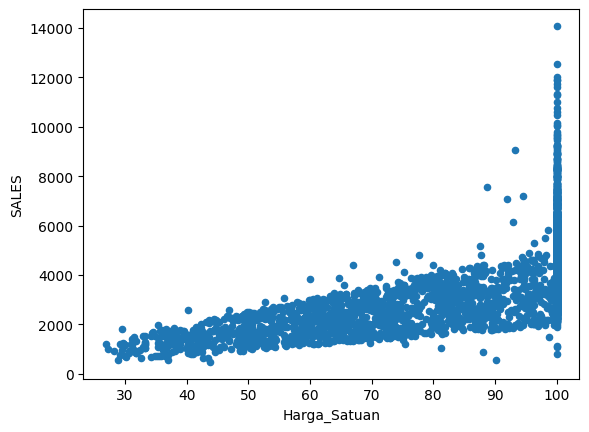

In [9]:
df.plot.scatter(x = 'Harga_Satuan', y ='SALES')

EDA


Import librari yang dibutuhkan

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set(style="whitegrid", font_scale=1.75)

In [11]:
df.groupby('STATUS')['Nomor_Pesanan'].count()

STATUS
Cancelled       60
Disputed        14
In Process      41
On Hold         44
Resolved        47
Shipped       2616
Name: Nomor_Pesanan, dtype: int64

<Figure size 1000x800 with 0 Axes>

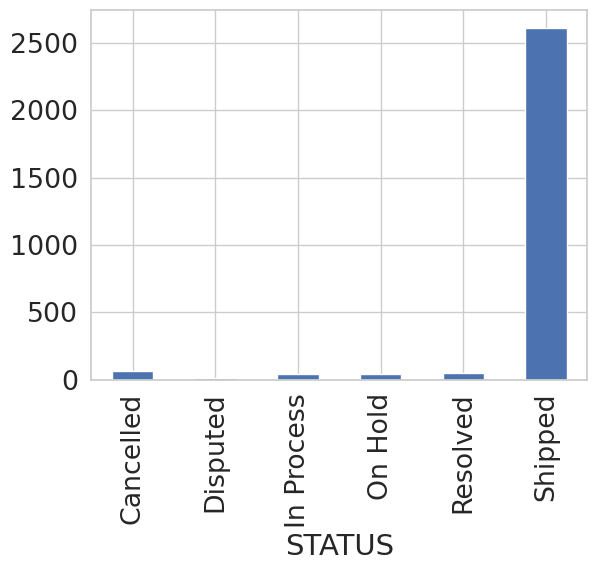

<Figure size 1000x800 with 0 Axes>

In [12]:
df.groupby('STATUS')['Nomor_Pesanan'].count().plot.bar()
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

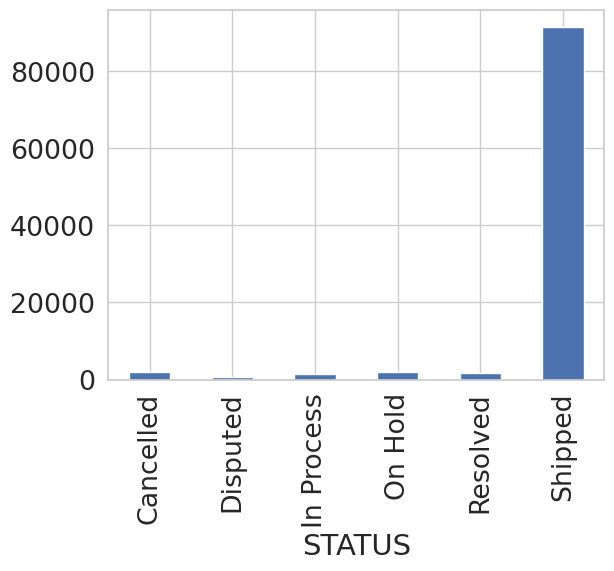

<Figure size 1000x800 with 0 Axes>

In [13]:
df.groupby('STATUS')['Quantity'].sum().plot.bar()
plt.figure(figsize=(10,8))

<Axes: xlabel='STATUS', ylabel='SALES'>

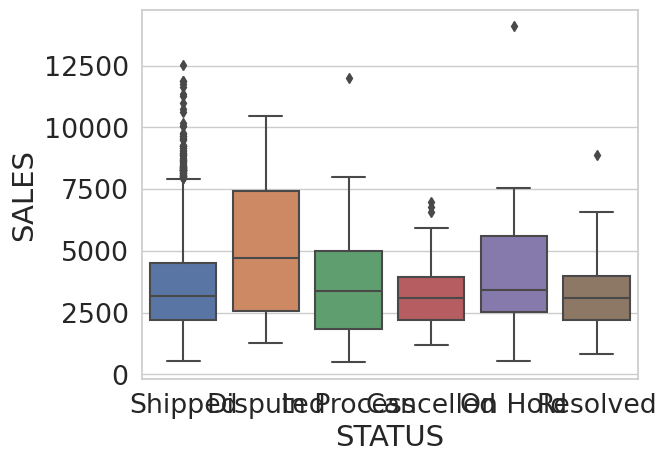

In [14]:
sns.boxplot(x= 'STATUS', y='SALES', data=df)